## Binomial prior example using R

we start with defining our prior:

In [113]:
Theta   <- c(0,0.5, 1) # the state space (i.e the domain of theta)
P_Theta = rep(1,3)/3   # unormalised prior

In [114]:
#view the variables
print(Theta)
print(P_Theta)

[1] 0.0 0.5 1.0
[1] 0.3333333 0.3333333 0.3333333


We denote head by 1 and tail with 0. 

In [115]:
coin_toss <- c(0,0,0,0,0,1)

The distribution of number of tails, $Y$, of $n$ coin tosses has a **Binomial distribution** with probability $\theta$. That is
$
Y \sim Bin(n,\theta).
$

In [116]:
Y <- sum(coin_toss)
n <- length(coin_toss)

To apply Bayes theorem we need the conditional distribution of $P(Y|\theta,n)$, since Y has Binomial distribution this is equal to
$$
P(Y|\theta,n) = \binom{n}{Y} \theta^Y (1-\theta)^{n- Y}.
$$
This is very easily caculated in R:

In [117]:
theta <- 0.5 # set a value of the
PYtheta <- dbinom(x = Y, size = n, prob  =theta)
print(PYtheta)

[1] 0.09375


This means that there is a 0.+93 probability of observing $Y$ tails with $n$ coin toss if the probabilility of tail is $\theta = 0.5$

Let us now use Bayes rule to caculate the posterior distribution of $\theta$:

In [118]:
likelihood <- dbinom(x = Y, size = n, prob  =Theta) # one can put in Prob as a vector in dbinom
posterior <- likelihood * P_Theta / sum(likelihood * P_Theta)

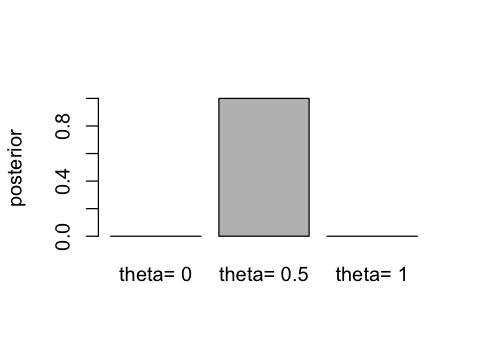

In [119]:
barplot( height   = posterior,
         names.ar = paste("theta=",Theta),
         ylab     = "posterior")

Let us examin what is happning:
We first evalute the likelihood as a function of $\theta$ (note that this is note a probability distribution)

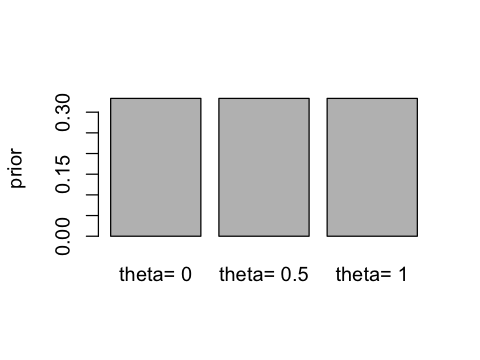

In [120]:
options(repr.plot.width=4, repr.plot.height=3)
barplot( height   = P_Theta,
         names.ar = paste("theta=",Theta),
         ylab     = "prior")

Then we evalute the likelihood as a function of $\theta$ (note that this is note a probability distribution)

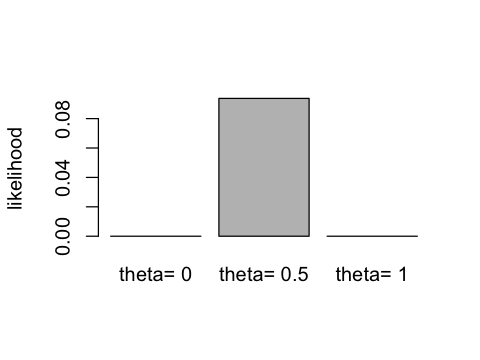

In [121]:
options(repr.plot.width=4, repr.plot.height=3)
barplot( height   = likelihood,
         names.ar = paste("theta=",Theta),
         ylab     = "likelihood")

Suppose we belive that some more values than 0,0.5,1 are possible. 
We set the prior:
$$
\pi(\theta)  \propto 0.5 - |\theta-0.5|
$$
For  $\theta = 0,0.1,0.2,\ldots,1.$

In [125]:
Theta   <- seq(0,1, length = 10) 
P_Theta =  0.5 - abs(0.5 - Theta)  # unormalised prior
print(Theta)

 [1] 0.0000000 0.1111111 0.2222222 0.3333333 0.4444444 0.5555556 0.6666667
 [8] 0.7777778 0.8888889 1.0000000


For the prior to be a proper probabilility distribution it needs to integrate to one:

In [126]:
P_Theta = P_Theta/sum(P_Theta)
print(P_Theta)

 [1] 0.00 0.05 0.10 0.15 0.20 0.20 0.15 0.10 0.05 0.00


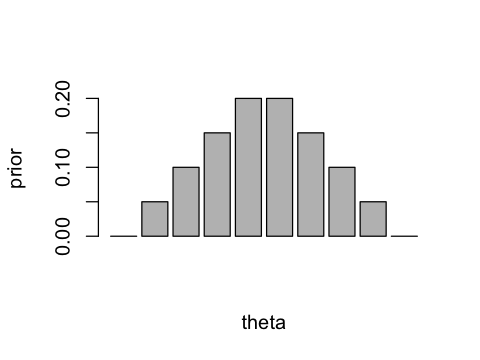

In [127]:
barplot( height   = P_Theta,
         xlab     = "theta",
         ylab     = "prior")

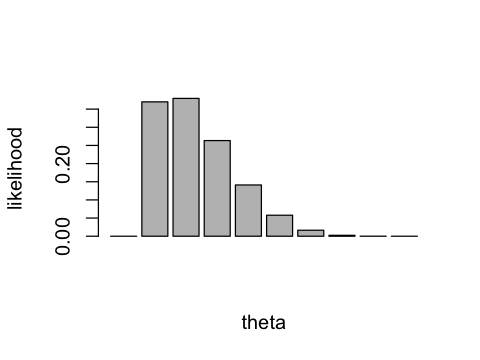

In [128]:
likelihood <- dbinom(x = Y, size = n, prob  =Theta) # one can put in Prob as a vector in dbinom
barplot( height   = likelihood,
         xlab     = "theta",
         ylab     = "likelihood")

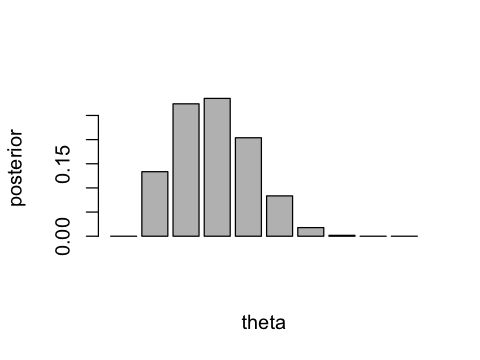

In [129]:
posterior <- likelihood * P_Theta / sum(likelihood * P_Theta)
barplot( height   = posterior,
         xlab     = "theta",
         ylab     = "posterior")

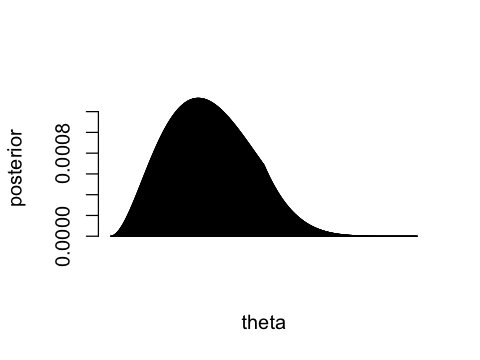

In [133]:
Theta   <- seq(0,1, length = 2000) 
P_Theta =  0.5 - abs(0.5 - Theta)  # unormalised prior
P_Theta = P_Theta/sum(P_Theta)
likelihood <- dbinom(x = Y, size = n, prob  =Theta) # one can put in Prob as a vector in dbinom
posterior <- likelihood * P_Theta / sum(likelihood * P_Theta)
barplot( height   = posterior,
         xlab      = "theta",
         ylab     = "posterior")

## Taking more and more increment we get closer and closer to a continous distribution

In [134]:
 Prior <- function(theta){ return(0.5 - abs(0.5 - theta)) }

As with discrete distribution we ned it to sum to one ( integrate to one)
$$\int_0^1 \pi(\theta) d\theta= 1.$$

In [135]:
integrate(Prior, lower = 0 , upper = 1)
Prior_norm <- function(theta){ return(4*(0.5 - abs(0.5 - theta))) }

0.25 with absolute error < 2.8e-15

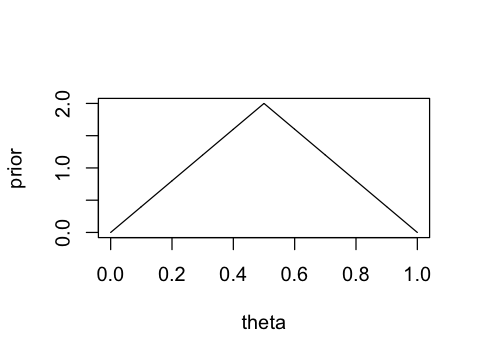

In [102]:
Theta   <- seq(0,1, length = 1000) 
plot(Theta, 
     Prior_norm(Theta), 
     xlab = "theta",
     ylab = "prior",
     type = 'l')

In [136]:
Posterior <- function(theta){dbinom(x = Y, size = n, prob  =theta) * Prior(theta)}
integrate(Posterior, lower = 0 , upper = 1)

0.0343192 with absolute error < 3.8e-16

In [137]:
Posterior_norm <- function(theta){dbinom(x = Y, size = n, prob  =theta) * Prior(theta)/0.1372768}

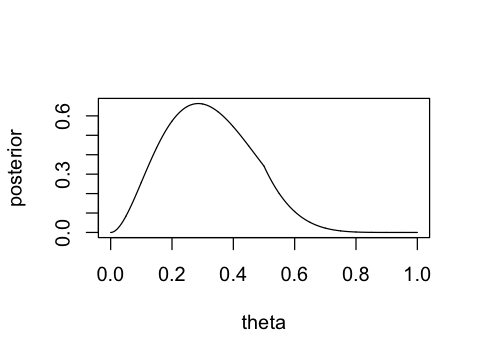

In [138]:
plot(Theta, 
     Posterior_norm(Theta), 
     xlab = "theta",
     ylab = "posterior",
     type = 'l')

Note to get the shape of posterior we don't need the normalising constant (the value so that the density integrates to one).

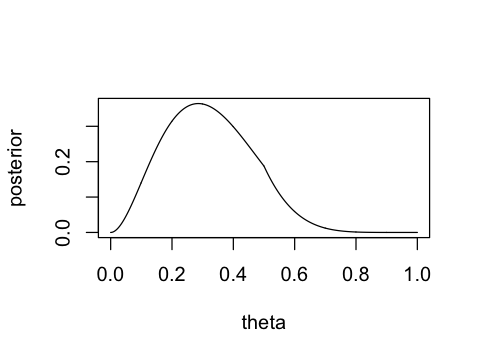

In [112]:
plot(Theta, 
     Posterior(Theta), 
     xlab = "theta",
     ylab = "posterior",
     type = 'l')